## Exploratory Data Analysis(Zillow Dataframe)
### Corey Solitaire
#### 10.13. 2020

In [1]:
import acquire
import prepare
import wrangle_zillow
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
from scipy import stats
from sklearn.preprocessing import StandardScaler, QuantileTransformer, PowerTransformer, RobustScaler, MinMaxScaler
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.feature_selection import f_regression, SelectKBest, RFE 
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

In [2]:
train, validate, test = wrangle_zillow.wrangle_zillow(wrangle_zillow.get_zillow_data(cached=False)) 

In [3]:
train.head()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,finishedsquarefeet12,fullbathcnt,latitude,longitude,lotsizesquarefeet,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,tdate,heatingorsystemdesc,propertylandusedesc,county
11612,11600673,3.0,3.0,7.0,1945.0,1945.0,3.0,34047894.0,-118376073.0,6322.0,...,784417.0,2016.0,548032.0,9564.10,6.037217e+13,0.001199,2017-02-23,Floor/Wall,Single Family Residential,Los Angeles
8246,13069625,3.0,4.0,8.0,2484.0,2484.0,3.0,34034760.0,-117827592.0,9595.0,...,575097.0,2016.0,254536.0,6942.29,6.037403e+13,-0.036281,2017-02-07,Central,Single Family Residential,Los Angeles
30920,17072012,4.5,4.0,8.0,3436.0,3436.0,4.0,34281197.0,-119228656.0,9767.0,...,560991.0,2016.0,197991.0,5943.90,6.037137e+13,-0.030303,2017-04-28,None,Single Family Residential,Ventura
3593,10767620,3.0,3.0,8.0,1972.0,1972.0,3.0,34212494.0,-118570382.0,5373.0,...,246702.0,2016.0,107778.0,3164.96,6.037134e+13,0.002852,2017-01-18,Central,Single Family Residential,Los Angeles
50544,11186544,3.0,4.0,7.0,2363.0,2363.0,3.0,34622804.0,-118200741.0,6007.0,...,105757.0,2016.0,16542.0,2598.21,6.037910e+13,-0.027416,2017-06-27,Central,Single Family Residential,Los Angeles


In [4]:
train.columns

Index(['parcelid', 'bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid',
       'calculatedfinishedsquarefeet', 'finishedsquarefeet12', 'fullbathcnt',
       'latitude', 'longitude', 'lotsizesquarefeet',
       'propertycountylandusecode', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidzip', 'roomcnt', 'unitcnt', 'yearbuilt',
       'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'assessmentyear',
       'landtaxvaluedollarcnt', 'taxamount', 'censustractandblock', 'logerror',
       'tdate', 'heatingorsystemdesc', 'propertylandusedesc', 'county'],
      dtype='object')

In [5]:
# Rename some colums for clarity
train.columns = ['parcelid', 'bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid',
       'squarefeet', 'delete_finishedsquarefeet12', 'delete_fullbathcnt',
       'latitude', 'longitude', 'lotsizesquarefeet',
       'landusecode', 'rawcensustractandblock', 'city',
       'delete_proertycounty', 'zip', 'roomcnt', 'unitcnt', 'yearbuilt',
       'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'assessmentyear',
       'landtaxvaluedollarcnt', 'taxamount', 'censustractandblock', 'logerror',
       'tdate', 'heatingorsystemdesc', 'propertylandusedesc', 'county']

## Zillow Dataset

### Create a python script or jupyter notebook named explore_zillow and do the following:

    - Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

    - Answer those questions through a mix of statistical tests and visualizations.
______________________________________________________

**Questions**

Target(y) = logerror

1. What is the distribution of each of the variables?
2. Is logerror significantly different for properties in La County vs. Orange County vs. Ventura County?
3. If we control for county, does logerror vary across property landusecode?
4. If we control for county, does logerror vary across yearbuilt?
5. If we control for county, is there a relationship between squarefeet and logerror?

#### 1. What is the distribution of each of the variables?

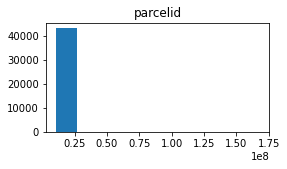

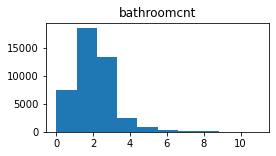

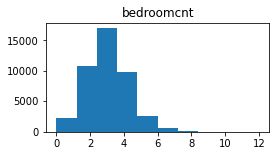

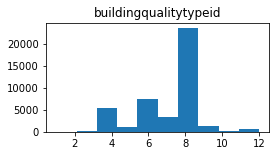

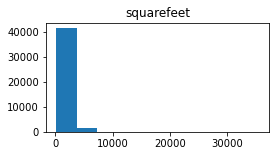

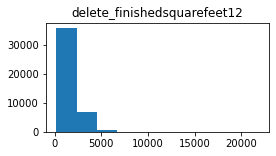

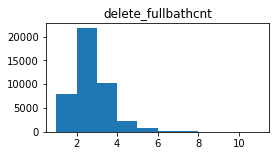

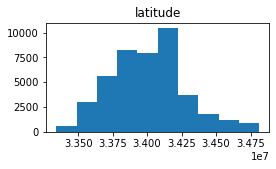

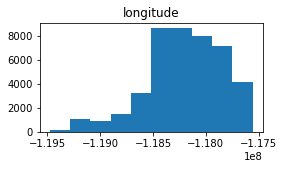

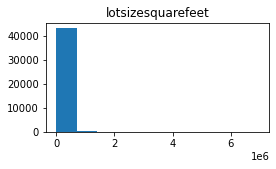

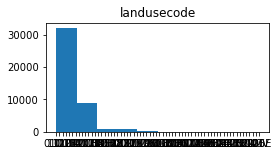

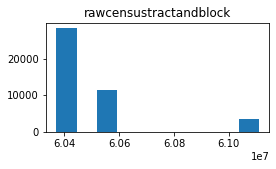

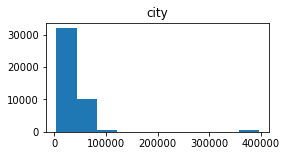

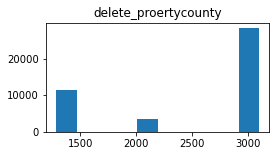

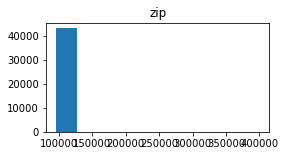

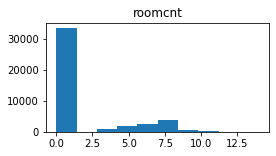

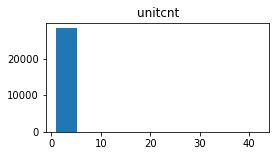

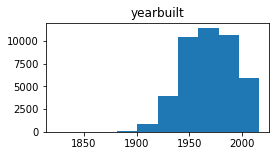

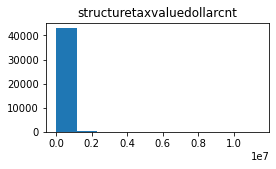

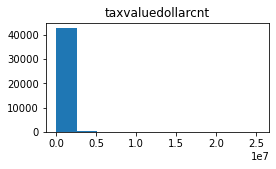

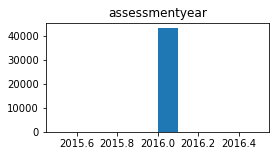

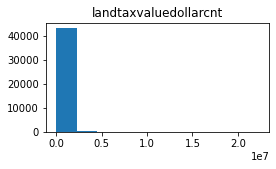

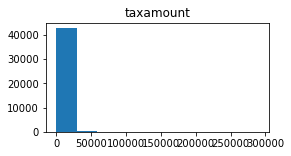

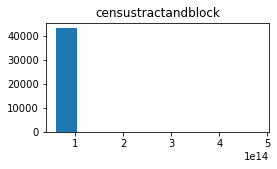

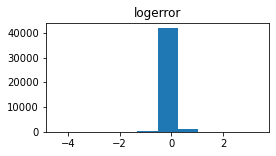

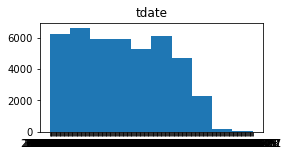

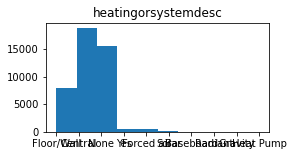

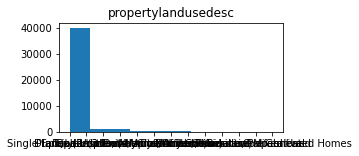

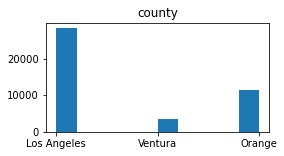

In [6]:
for col in train.columns:
    plt.figure(figsize=(4,2))
    plt.hist(train[col])
    plt.title(col)
    plt.show()

**Conclusion**

- Bin squarefeet to get a better view of distribution
- landusecode is skewed to the right
- yearbuilt has a pretty even distribution
- county is not even in number of observations, need to seperate data by county for further exploration

#### Break down by county

In [7]:
# LA County
la_df = train[train.county=='Los Angeles']
la_df.shape

(28328, 29)

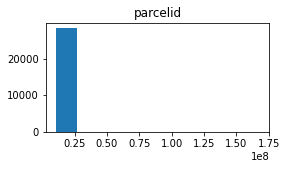

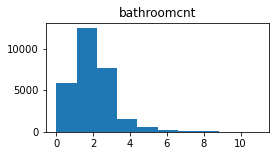

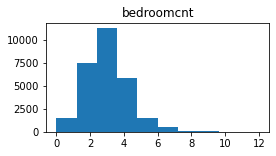

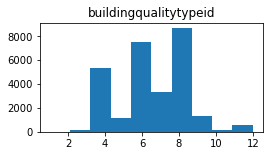

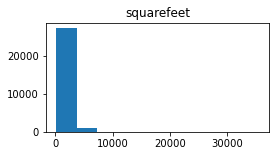

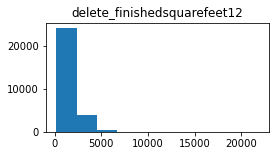

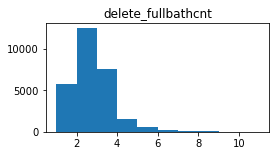

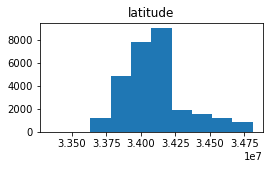

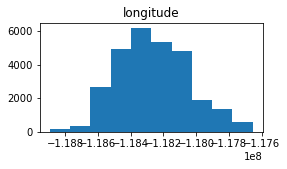

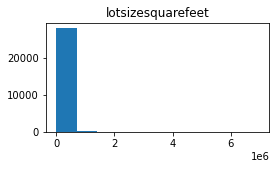

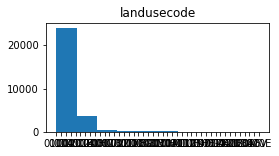

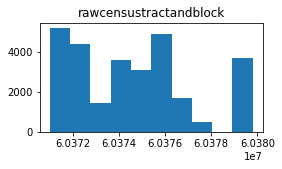

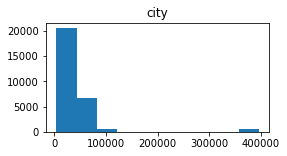

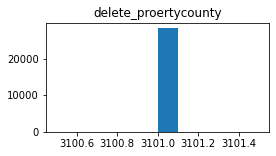

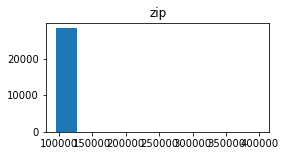

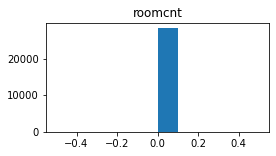

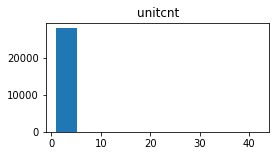

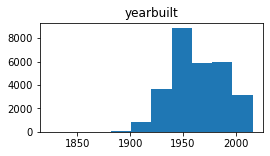

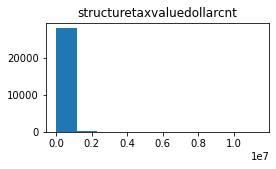

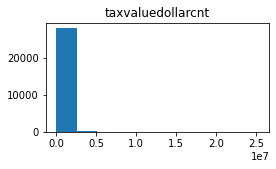

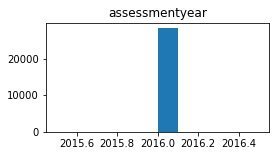

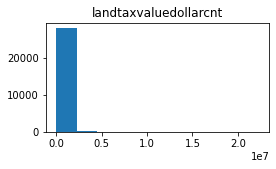

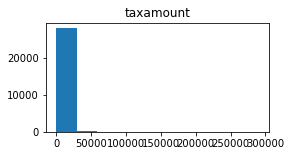

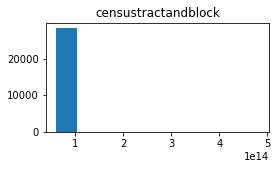

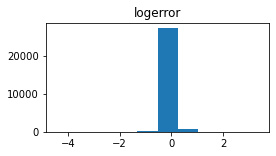

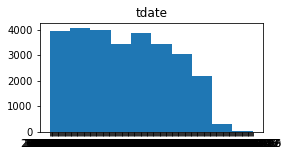

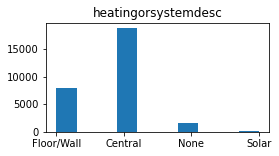

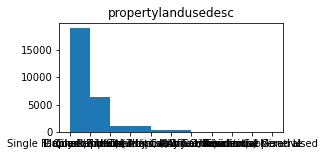

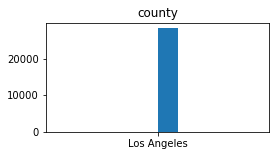

In [13]:
# Visualize LA County
for col in la_df.columns:
    plt.figure(figsize=(4,2))
    plt.hist(la_df[col])
    plt.title(col)
    plt.show()

**Conclusion**

- Bin squarefeet to get a better view of distribution
- landusecode is skewed to the right
- yearbuilt has a pretty even distribution


***

In [9]:
# Ventura County
va_df = train[train.county=='Ventura']
va_df.shape

(3489, 29)

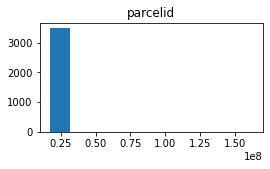

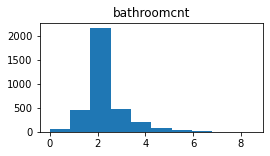

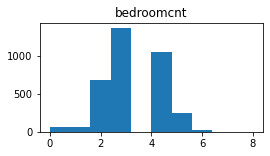

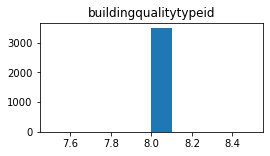

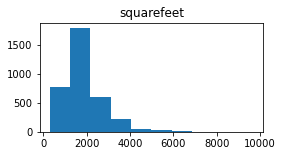

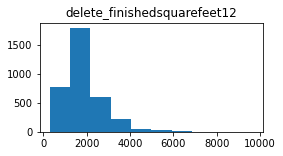

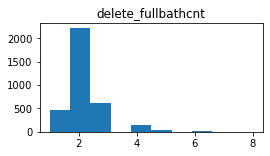

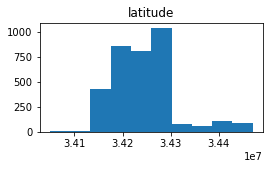

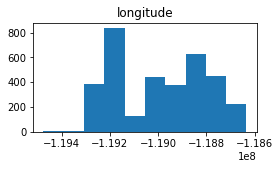

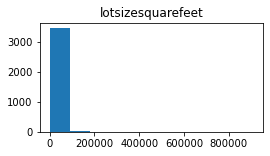

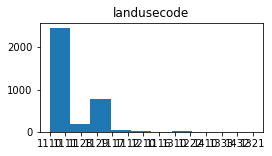

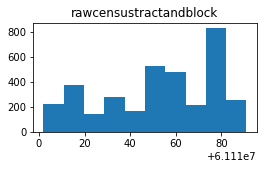

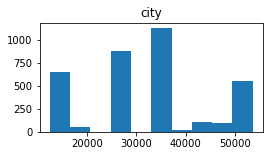

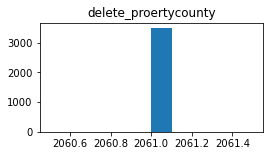

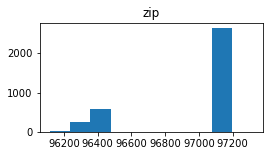

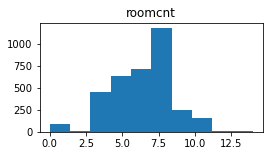

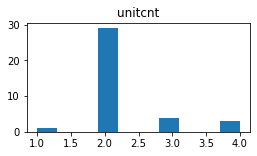

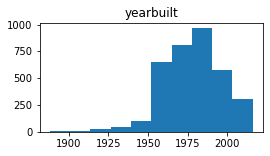

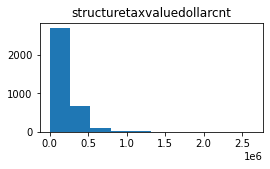

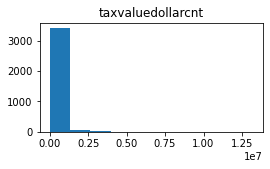

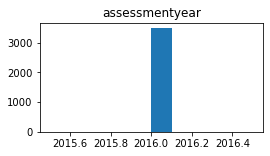

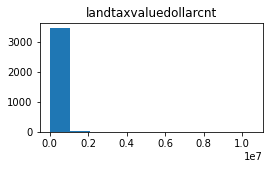

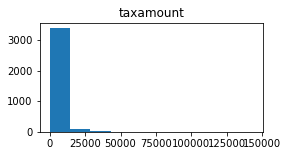

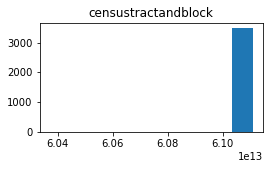

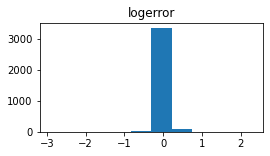

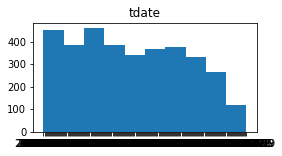

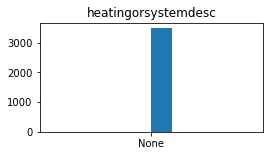

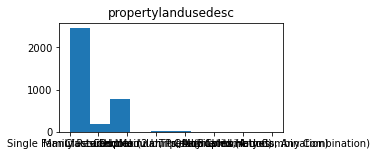

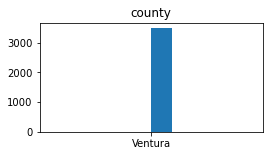

In [14]:
# Visualize Ventura County
for col in va_df.columns:
    plt.figure(figsize=(4,2))
    plt.hist(va_df[col])
    plt.title(col)
    plt.show()

In [11]:
# Orange County
or_df = train[train.county=='Orange']
or_df.shape

(11503, 29)

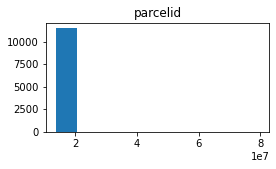

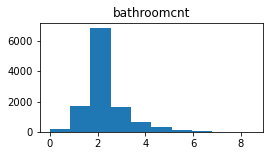

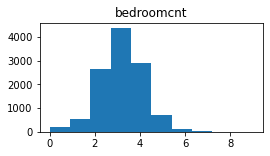

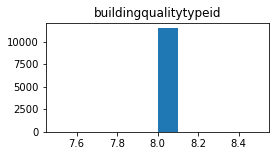

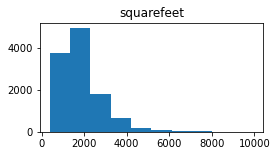

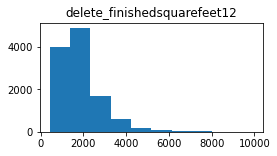

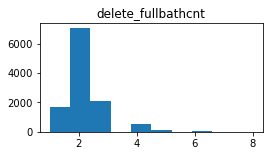

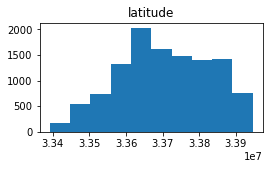

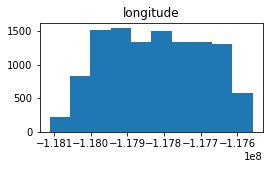

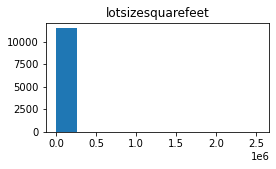

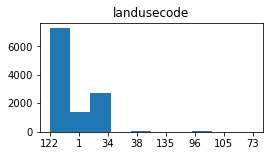

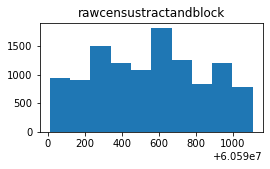

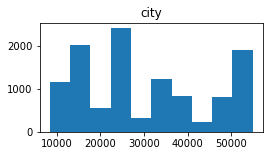

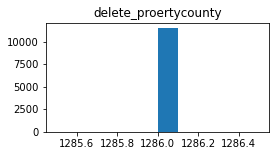

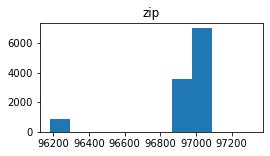

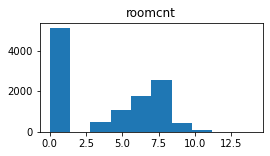

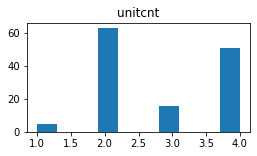

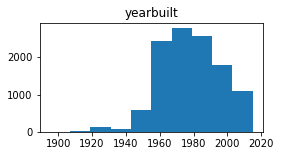

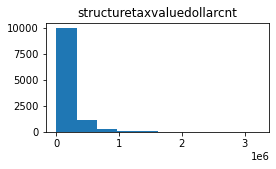

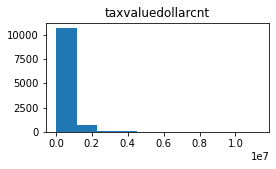

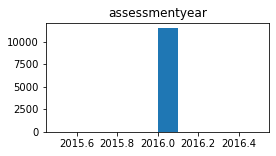

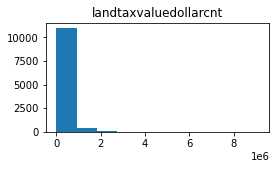

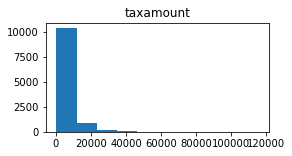

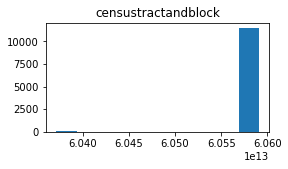

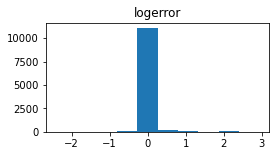

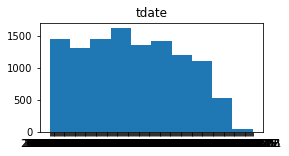

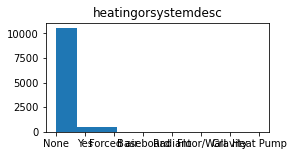

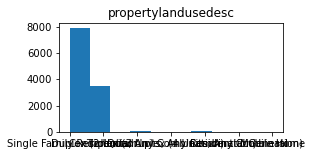

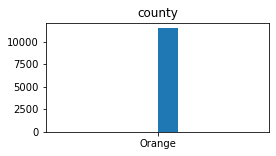

In [15]:
# Visualize Orange County
for col in or_df.columns:
    plt.figure(figsize=(4,2))
    plt.hist(or_df[col])
    plt.title(col)
    plt.show()

### In your exploration, be sure you include the following:

    - a plot with at least 3 dimensions, such as x, y, and color.

    - at least 3 different types of plots (like box, scatter, bar, ...)

    - at least 2 statistical tests.

    - document takeaways/conclusions after each question is addressed.
______________________________________________________

**Bonus:**

***Compute the mean(logerror) by zipcode and the overall mean(logerror). Write a loop that will run a t-test between the overall mean and the mean for each zip code. We want to identify the zip codes where the error is significantly higher or lower than the expected error.***